In [1]:
import pandas as pd
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
column_names = pd.read_csv("allhypo-edit.names.txt")

In [3]:
list(column_names)

['age',
 ' sex',
 ' on thyroxine',
 ' query on thyroxine',
 ' on antithyroid medication',
 ' sick',
 ' pregnant',
 ' thyroid surgery',
 ' I131 treatment',
 ' query hypothyroid',
 ' query hyperthyroid',
 ' lithium',
 ' goitre',
 ' tumor',
 ' hypopituitary',
 ' psych',
 ' TSH measured',
 ' TSH',
 ' T3 measured',
 ' T3',
 ' TT4 measured',
 ' TT4',
 ' T4U measured',
 ' T4U',
 ' FTI measured',
 ' FTI',
 ' TBG measured',
 ' TBG',
 ' referral source',
 ' classes']

In [4]:
names = ['age',
 'sex',
 'on thyroxine',
 'query on thyroxine',
 'on antithyroid medication',
 'sick',
 'pregnant',
 'thyroid surgery',
 'I131 treatment',
 'query hypothyroid',
 'query hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'TSH measured',
 'TSH',
 'T3 measured',
 'T3',
 'TT4 measured',
 'TT4',
 'T4U measured',
 'T4U',
 'FTI measured',
 'FTI',
 'TBG measured',
 'TBG',
 'referral source',
 'classes']

In [5]:
hypodata = pd.read_csv("allhypo.data.txt", header=None)

In [6]:
hypodata.columns = names

In [7]:
hypodata.head(3)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,classes
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative.|3733
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative.|1442
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative.|2965


In [8]:
hypodata2 = hypodata[['age','TSH', 'T3', 'TT4', 'T4U', 'FTI', 'classes']]
# hypodata2 includes only numeric data

In [9]:
hypodata2.head(3)

,age,TSH,T3,TT4,T4U,FTI,classes
0,41,1.3,2.5,125,1.14,109,negative.|3733
1,23,4.1,2,102,?,?,negative.|1442
2,46,0.98,?,109,0.91,120,negative.|2965


In [10]:
# split "classes" on ".|" to get class label  
hypodata_class2 = hypodata2["classes"].str.split('.\|', 1, expand=True).rename(columns={0:'classes', 1:'id?'})

In [11]:
hypodata_class2.head()

,classes,id?
0,negative,3733
1,negative,1442
2,negative,2965
3,negative,806
4,negative,2807


In [12]:
hypodata2.loc[:,'classes'] = hypodata_class2.loc[:,'classes']

/home/jun3/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [13]:
hypodata2.head()

,age,TSH,T3,TT4,T4U,FTI,classes
0,41,1.3,2.5,125,1.14,109,negative
1,23,4.1,2,102,?,?,negative
2,46,0.98,?,109,0.91,120,negative
3,70,0.16,1.9,175,?,?,negative
4,70,0.72,1.2,61,0.87,70,negative


In [14]:
hypodata2.columns

Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'classes'], dtype='object')

In [15]:
# to see NAN values as ?
hypodata['TSH'].describe()

count     2800
unique     264
top          ?
freq       284
Name: TSH, dtype: object

In [16]:
hypodata['T3'].describe()

count     2800
unique      65
top          ?
freq       585
Name: T3, dtype: object

In [17]:
hypodata['TT4'].describe()

count     2800
unique     218
top          ?
freq       184
Name: TT4, dtype: object

In [18]:
hypodata['T4U'].describe()

count     2800
unique     139
top          ?
freq       297
Name: T4U, dtype: object

In [19]:
hypodata['FTI'].describe()

count     2800
unique     210
top          ?
freq       295
Name: FTI, dtype: object

In [20]:
y_class = {'negative': 0, 'primary hypothyroid': 1,
      'compensated hypothyroid':2, 'secondary hypothyroid': 3 }

In [21]:
hypodata2['classes'].replace(to_replace=y_class, inplace=True)

/home/jun3/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [22]:
repl = {"?": np.nan}

In [23]:
hypodata2.replace(to_replace=repl, value=None, inplace=True, limit=None, regex=False, method='pad')

/home/jun3/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3795: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


In [24]:
# change numeric data type from string to float
tofloat = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
hypodata2[tofloat] = hypodata2[tofloat].astype(float)

/home/jun3/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [25]:
hypodata2.head()

,age,TSH,T3,TT4,T4U,FTI,classes
0,41.0,1.30,2.5,125.0,1.14,109.0,0
1,23.0,4.10,2.0,102.0,NaN,NaN,0
2,46.0,0.98,NaN,109.0,0.91,120.0,0
3,70.0,0.16,1.9,175.0,NaN,NaN,0
4,70.0,0.72,1.2,61.0,0.87,70.0,0


In [26]:
hypotest = pd.read_csv("allhypo.test.txt",header=None)

In [27]:
hypotest.columns = names

In [28]:
hypotest.head(3)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,classes
0,35,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,negative.|219
1,63,M,f,f,f,f,f,f,f,f,...,t,108,t,0.96,t,113,f,?,SVI,negative.|2059
2,25,F,f,f,f,f,f,f,f,f,...,t,61,t,0.82,t,75,f,?,SVHD,negative.|399


In [29]:
hypotest2 = hypotest[['age','TSH', 'T3', 'TT4', 'T4U', 'FTI', 'classes']]

In [30]:
# split "classes" on ".|" to get class label on test data too
hypotest_class2 = hypotest2["classes"].str.split('.\|', 1, expand=True).rename(columns={0:'classes', 1:'id?'})

In [31]:
hypotest_class2.head()

,classes,id?
0,negative,219
1,negative,2059
2,negative,399
3,negative,1911
4,negative,487


In [32]:
hypotest2['classes'] = hypotest_class2['classes']

/home/jun3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
hypotest2['classes'].replace(to_replace=y_class, inplace=True)

/home/jun3/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [34]:
repl = {"?": np.nan}
hypotest2.replace(to_replace=repl, value=None, inplace=True, limit=None, regex=False, method='pad')

/home/jun3/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3795: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


In [35]:
hypotest2.head()

,age,TSH,T3,TT4,T4U,FTI,classes
0,35,NaN,NaN,NaN,NaN,NaN,0
1,63,3.5,2.5,108,0.96,113,0
2,25,4.6,2.4,61,0.82,75,0
3,53,0.25,2.1,145,1.03,141,0
4,92,0.7,1.3,120,0.84,143,0


In [36]:
hypodata2.head()

,age,TSH,T3,TT4,T4U,FTI,classes
0,41.0,1.30,2.5,125.0,1.14,109.0,0
1,23.0,4.10,2.0,102.0,NaN,NaN,0
2,46.0,0.98,NaN,109.0,0.91,120.0,0
3,70.0,0.16,1.9,175.0,NaN,NaN,0
4,70.0,0.72,1.2,61.0,0.87,70.0,0


In [37]:
# change numeric data type from string to float
tofloat = ['age','TSH', 'T3', 'TT4', 'T4U', 'FTI']
hypotest2[tofloat] = hypotest2[tofloat].astype(float)

/home/jun3/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


#### about 10% "FTI" data are missing. Fill the missing data with mean value. Other numeric columns also have relatively small % of missing values

In [38]:
rep_lst = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
rep_val = hypodata2[rep_lst].mean().round(3)

In [39]:
rep_val

age     51.844
TSH      4.672
T3       2.025
TT4    109.072
T4U      0.998
FTI    110.788
dtype: float64

In [40]:
# replacing missing data with mean data. 

# rep_val = [51.8, 4.672, 2.025, 109.072, 0.998, 110.788]
for i, val in enumerate(rep_val):
    hypodata2[rep_lst[i]].fillna(value = val, inplace=True) 

/home/jun3/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [41]:
hypodata2.head()

,age,TSH,T3,TT4,T4U,FTI,classes
0,41.0,1.30,2.500,125.0,1.140,109.000,0
1,23.0,4.10,2.000,102.0,0.998,110.788,0
2,46.0,0.98,2.025,109.0,0.910,120.000,0
3,70.0,0.16,1.900,175.0,0.998,110.788,0
4,70.0,0.72,1.200,61.0,0.870,70.000,0


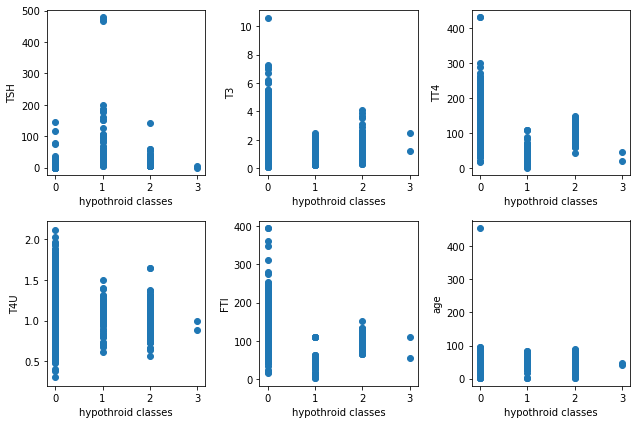

In [42]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(9, 6))

ax[0, 0].scatter(hypodata2["classes"], hypodata2["TSH"])
ax[0, 0].set_xscale("linear")
ax[0, 0].set_ylabel('TSH')
ax[0, 0].set_xlabel('hypothroid classes')
ax[0, 1].scatter(hypodata2["classes"], hypodata2["T3"])
ax[0, 1].set_xscale("linear")
ax[0, 1].set_ylabel('T3')
ax[0, 1].set_xlabel('hypothroid classes')
ax[0, 2].scatter(hypodata2["classes"], hypodata2["TT4"])
ax[0, 2].set_xscale("linear")
ax[0, 2].set_ylabel('TT4')
ax[0, 2].set_xlabel('hypothroid classes')
ax[1, 0].scatter(hypodata2["classes"], hypodata2["T4U"])
ax[1, 0].set_xscale("linear")
ax[1, 0].set_ylabel('T4U')
ax[1, 0].set_xlabel('hypothroid classes')
ax[1, 1].scatter(hypodata2["classes"], hypodata2["FTI"])
ax[1, 1].set_xscale("linear")
ax[1, 1].set_ylabel('FTI')
ax[1, 1].set_xlabel('hypothroid classes')
ax[1, 2].scatter(hypodata2["classes"], hypodata2["age"])
ax[1, 2].set_xscale("linear")
ax[1, 2].set_ylabel('age')
ax[1, 2].set_xlabel('hypothroid classes')
plt.tight_layout()
plt.savefig("thyroid hormones.png", dpi=300)
### TSH are higher in class 1
### T3 levels are lower in class 1, 2 and 3
### TT4 levels are lower in class 1, 2 and 3
### FTI levels are lower in class 1, 2 and 3

In [43]:
hypodata_mean_values = pd.DataFrame(rep_val, rep_lst)

In [44]:
hypodata_mean_values = hypodata_mean_values.transpose()
hypodata_mean_values

,age,TSH,T3,TT4,T4U,FTI
0,51.844,4.672,2.025,109.072,0.998,110.788


In [45]:
hypodata_mean_values.to_csv('hypodata_mean_values for filling nan values')

In [46]:
for i, val in enumerate(rep_val):
    hypotest2[rep_lst[i]].fillna(value = val, inplace=True) 
### test data fills the same mean values from training data

/home/jun3/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [47]:
hypotest2.head()

,age,TSH,T3,TT4,T4U,FTI,classes
0,35.0,4.672,2.025,109.072,0.998,110.788,0
1,63.0,3.500,2.500,108.000,0.960,113.000,0
2,25.0,4.600,2.400,61.000,0.820,75.000,0
3,53.0,0.250,2.100,145.000,1.030,141.000,0
4,92.0,0.700,1.300,120.000,0.840,143.000,0


In [48]:
hypodata2.to_csv("hypodata_numeric.csv", encoding='utf-8', index=False)
# save processed data

In [49]:
hypotest2.to_csv("hypotest_numeric.csv", encoding='utf-8', index=False)
# save processed data

In [50]:
pd.read_csv("hypotest_numeric.csv", encoding='utf-8').head()

,age,TSH,T3,TT4,T4U,FTI,classes
0,35.0,4.672,2.025,109.072,0.998,110.788,0
1,63.0,3.500,2.500,108.000,0.960,113.000,0
2,25.0,4.600,2.400,61.000,0.820,75.000,0
3,53.0,0.250,2.100,145.000,1.030,141.000,0
4,92.0,0.700,1.300,120.000,0.840,143.000,0


In [51]:
scaling_lst = ['age','TSH', 'T3', 'TT4', 'T4U', 'FTI']
min_hypodata2 = hypodata2.loc[:, scaling_lst].min()

In [52]:
df_min = pd.DataFrame(min_hypodata2, index=None)

In [53]:
df_min.transpose()

,age,TSH,T3,TT4,T4U,FTI
0,1.0,0.005,0.05,2.0,0.31,2.0


In [54]:
df_min.transpose().to_csv('hypodata_min_for_scaling.csv', encoding='utf-8', index=False)
# save the min for future data scaling in the flask app 

In [55]:
max_hypodata2 = hypodata2.loc[:, scaling_lst].max()

In [56]:
max_hypodata2

age    455.00
TSH    478.00
T3      10.60
TT4    430.00
T4U      2.12
FTI    395.00
dtype: float64

In [65]:
hypodata2.loc[hypodata2['age']==455.00,'age'] = hypodata2['age'].mean()
# One age data point is off as it's impossible to live 455 years.

/home/jun3/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [57]:
max_hypodata2 = hypodata2.loc[:, scaling_lst].max()
max_hypodata2

age    455.00
TSH    478.00
T3      10.60
TT4    430.00
T4U      2.12
FTI    395.00
dtype: float64

In [58]:
df_max = pd.DataFrame(max_hypodata2, index=None)

In [59]:
df_max.transpose().to_csv('hypodata_max_for_scaling.csv', encoding='utf-8', index=False)
# save the miax for future data scaling in the flask app

In [61]:
df_max = pd.read_csv('hypodata_max_for_scaling.csv')
df_max

,age,TSH,T3,TT4,T4U,FTI
0,455.0,478.0,10.6,430.0,2.12,395.0


In [62]:
def min_max_scaling(df, scaling_col):
    df.loc[:,scaling_col] = (df.loc[:,scaling_col]-df.loc[:, scaling_col].min())/(df.loc[:, scaling_col].max()-df.loc[:, scaling_col].min())
    return df   

In [63]:
min_max_scaling(hypodata2, scaling_lst);

/home/jun3/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [64]:
hypodata2.head()

,age,TSH,T3,TT4,T4U,FTI,classes
0,0.088106,0.002709,0.232227,0.287383,0.458564,0.272265,0
1,0.048458,0.008567,0.184834,0.233645,0.380110,0.276814,0
2,0.099119,0.002040,0.187204,0.250000,0.331492,0.300254,0
3,0.151982,0.000324,0.175355,0.404206,0.380110,0.276814,0
4,0.151982,0.001496,0.109005,0.137850,0.309392,0.173028,0


In [65]:
hypodata2.to_csv('hypodata_numeric_scaled.csv', encoding='utf-8', index=False)